<a href="https://colab.research.google.com/github/LsHFYKR/tibame00922/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris["data"],columns=iris["feature_names"])
# df["seoal length (cm)"]
# Series : df["sepal length ()cm"]
df["ans"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [32]:
# 進入sklean以後, 我們就不要用df, numpy array
import numpy as np
from sklearn.model_selection import train_test_split

y = np.array(df["ans"])
# axis參數
x = np.array(df.drop(["ans"], axis=1))
# 90% x, 10% x, 90% y, 10% y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
# numpy: .shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 4)
(15, 4)
(135,)
(15,)


In [33]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(312.48, 634.1999999999999, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 135\nvalue = [46, 46, 43]\nclass = setosa'),
 Text(156.24, 380.52, 'gini = 0.0\nsamples = 46\nvalue = [46, 0, 0]\nclass = setosa'),
 Text(468.72, 380.52, 'petal length (cm) <= 4.75\ngini = 0.499\nsamples = 89\nvalue = [0, 46, 43]\nclass = versicolor'),
 Text(312.48, 126.84000000000003, 'gini = 0.046\nsamples = 42\nvalue = [0, 41, 1]\nclass = versicolor'),
 Text(624.96, 126.84000000000003, 'gini = 0.19\nsamples = 47\nvalue = [0, 5, 42]\nclass = virginica')]

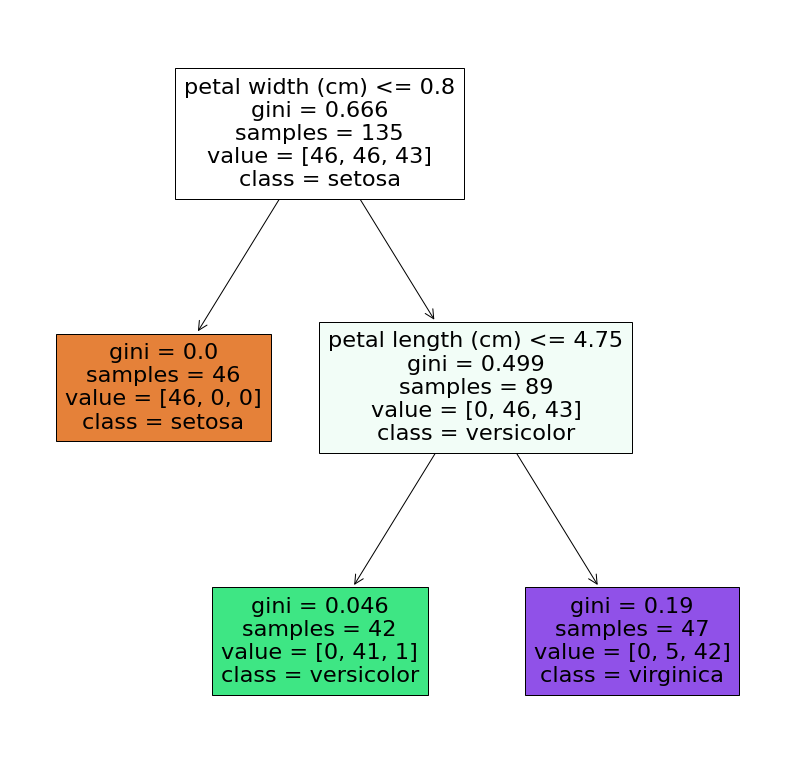

In [34]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(14, 14))
plot_tree(clf,
          feature_names=iris["feature_names"],
          class_names=iris["target_names"],
          filled=True)

In [35]:
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(pre, y_test)

0.9333333333333333